In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc,os,sys

sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.3f}'.format

In [24]:
%%time
train = pd.read_csv('dataset/train.csv/train.csv')
test = pd.read_csv('dataset/test.csv/test.csv')

print(train.shape, test.shape)

(200000, 202) (200000, 201)
CPU times: total: 6.09 s
Wall time: 9.59 s


In [25]:
for c in train.columns:
    if c not in test.columns: print(c)

target


In [26]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.925,-6.786,11.908,5.093,11.461,-9.283,5.119,18.627,...,4.435,3.964,3.136,1.691,18.523,-2.398,7.878,8.563,12.780,-1.091
1,train_1,0,11.501,-4.147,13.859,5.389,12.362,7.043,5.621,16.534,...,7.642,7.721,2.584,10.952,15.431,2.034,8.127,8.789,18.356,1.952
2,train_2,0,8.609,-2.746,12.081,7.893,10.582,-9.084,6.943,14.616,...,2.906,9.790,1.670,1.686,21.604,3.142,-6.521,8.268,14.722,0.397
3,train_3,0,11.060,-2.152,8.952,7.196,12.585,-1.836,5.843,14.925,...,4.467,4.743,0.718,1.421,23.035,-1.271,-2.928,10.292,17.970,-9.000
4,train_4,0,9.837,-1.483,12.875,6.638,12.277,2.449,5.941,19.251,...,-1.490,9.521,-0.151,9.194,13.288,-1.512,3.927,9.503,17.997,-8.810


In [27]:
null_cnt = train.isnull().sum().sort_values()
print('null count:', null_cnt[null_cnt > 0])

null count: Series([], dtype: int64)


In [28]:
numcols = train.drop('target',axis=1).select_dtypes(include='number').columns.values

<Axes: xlabel='target'>

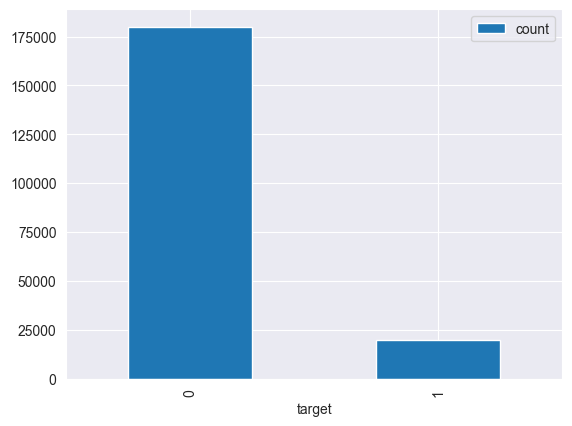

In [29]:
train['target'].value_counts().to_frame().plot.bar()

In [30]:
all_data = pd.concat([train, test], ignore_index=True, sort=False)
del train, test
gc.collect()

all_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0.000,8.925,-6.786,11.908,5.093,11.461,-9.283,5.119,18.627,...,4.435,3.964,3.136,1.691,18.523,-2.398,7.878,8.563,12.780,-1.091
1,train_1,0.000,11.501,-4.147,13.859,5.389,12.362,7.043,5.621,16.534,...,7.642,7.721,2.584,10.952,15.431,2.034,8.127,8.789,18.356,1.952
2,train_2,0.000,8.609,-2.746,12.081,7.893,10.582,-9.084,6.943,14.616,...,2.906,9.790,1.670,1.686,21.604,3.142,-6.521,8.268,14.722,0.397
3,train_3,0.000,11.060,-2.152,8.952,7.196,12.585,-1.836,5.843,14.925,...,4.467,4.743,0.718,1.421,23.035,-1.271,-2.928,10.292,17.970,-9.000
4,train_4,0.000,9.837,-1.483,12.875,6.638,12.277,2.449,5.941,19.251,...,-1.490,9.521,-0.151,9.194,13.288,-1.512,3.927,9.503,17.997,-8.810


In [31]:
constant_column = [col for col in all_data.columns if all_data[col].nunique() == 1]
print('drop columns:', constant_column)
all_data.drop(constant_column, axis=1, inplace=True)

drop columns: []


In [32]:

# Select only numeric columns from the DataFrame
numeric_data = all_data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.95)]
del upper

drop_column = all_data.columns[to_drop]
print('drop columns:', drop_column)
#all_data.drop(drop_column, axis=1, inplace=True)

drop columns: Index([], dtype='object')


In [33]:
cols = [col for col in all_data.columns if col not in ['ID_code']]
for col, dtype in all_data.loc[:, cols].dtypes.items():
    if dtype == object:
        print(col)
        all_data[col] = pd.factorize(all_data[col])[0]


In [34]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MaxAbsScaler()
scaler = preprocessing.RobustScaler()
all_data.loc[:,numcols] = scaler.fit_transform(all_data[numcols])

In [35]:
_='''noneffective
feats = ["var_{}".format(i) for i in range(200)]
for f in feats:
    all_data[f] = pd.cut(all_data[f], 100, labels=range(100))
'''

In [36]:
all_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0.000,-0.371,-0.854,0.354,-0.561,0.150,-0.367,-0.219,0.424,...,0.194,-0.780,0.600,-0.307,0.117,-1.115,0.645,-0.244,-0.749,0.104
1,train_1,0.000,0.228,-0.420,0.871,-0.465,0.531,0.979,0.188,0.018,...,0.691,0.082,0.332,1.345,-0.533,1.101,0.674,-0.076,0.573,0.294
2,train_2,0.000,-0.444,-0.189,0.400,0.347,-0.220,-0.350,1.259,-0.353,...,-0.043,0.557,-0.110,-0.308,0.764,1.655,-1.052,-0.465,-0.289,0.197
3,train_3,0.000,0.126,-0.091,-0.428,0.121,0.625,0.247,0.368,-0.294,...,0.199,-0.601,-0.571,-0.355,1.064,-0.552,-0.629,1.047,0.482,-0.388
4,train_4,0.000,-0.159,0.019,0.610,-0.060,0.495,0.600,0.447,0.545,...,-0.724,0.495,-0.991,1.032,-0.983,-0.672,0.179,0.457,0.488,-0.376


In [37]:
X_train = all_data[all_data['target'].notnull()].reset_index(drop=True)
X_test = all_data[all_data['target'].isnull()].drop(['target'], axis=1).reset_index(drop=True)
del all_data
gc.collect()

# drop ID_code
X_train.drop(['ID_code'], axis=1, inplace=True)
X_test_ID = X_test.pop('ID_code')

Y_train = X_train.pop('target')

print(X_train.shape, X_test.shape)

(200000, 200) (200000, 200)


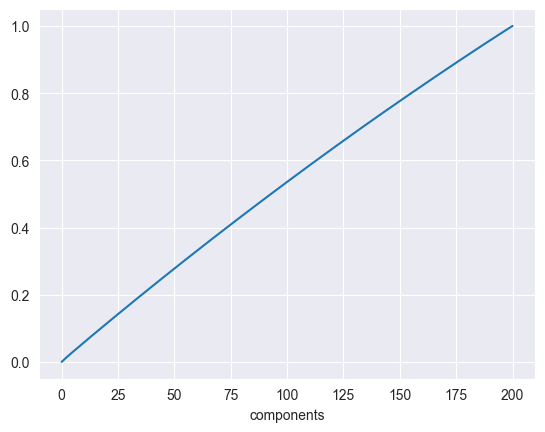

In [38]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


pca = PCA()
pca.fit(X_train)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])

plt.xlabel('components')
plt.plot(ev_ratio)
plt.show()

In [39]:
_='''
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
            
    return n_components

lda = LDA(n_components=None)
lda.fit(X_train, Y_train)
print(select_n_components(lda.explained_variance_ratio_, 0.95))
'''

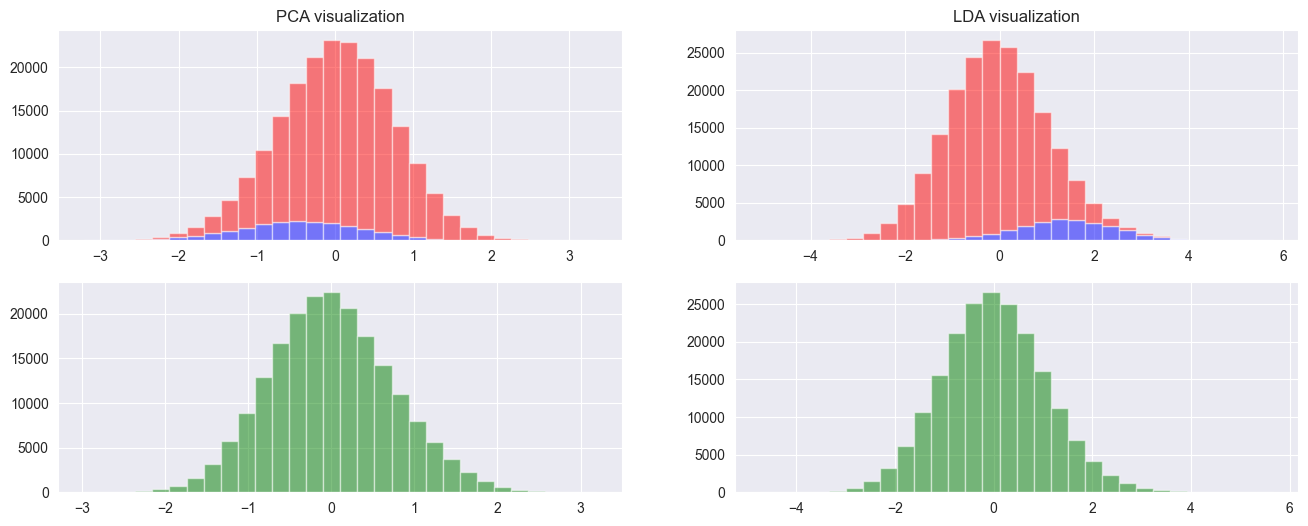

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(16, 6))
ax = ax.ravel()

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
pca_1 = X_train_pca[Y_train > 0].reshape(-1)
pca_0 = X_train_pca[Y_train == 0].reshape(-1)
ax[0].hist([pca_1, pca_0], color=['b','r'], bins=30, alpha=0.5, histtype='barstacked')
ax[0].set_title('PCA visualization')

lda = LDA(n_components=1)
lda.fit(X_train, Y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
lda_1 = X_train_lda[Y_train > 0].reshape(-1)
lda_0 = X_train_lda[Y_train == 0].reshape(-1)
ax[1].hist([lda_1, lda_0], color=['b','r'], bins=30, alpha=0.5, histtype='barstacked')
ax[1].set_title('LDA visualization')

ax[2].hist(X_test_pca, color='g', bins=30, alpha=0.5, histtype='barstacked')
ax[3].hist(X_test_lda, color='g', bins=30, alpha=0.5, histtype='barstacked')

plt.show()

In [41]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_train))
reduced

,0,1
0,-0.134,0.425
1,0.469,-1.709
2,-0.585,0.048
3,1.062,-0.007
4,0.685,0.286
...,...,...
199995,0.236,-0.090
199996,-0.114,-0.635
199997,0.295,-1.376
199998,-0.885,-0.380


In [43]:
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pca, X_train, Y_train, cv=skf)
print("PCA, Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    
scores = cross_val_score(lda, X_train, Y_train, cv=skf) # max components is (classes - 1)
print("LDA, Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))



PCA, Accuracy: -207.4807 (+/- 0.0516)
LDA, Accuracy: 0.9142 (+/- 0.0017)
